In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Acá ni siquiera me voy a molestar a pasar de resistencia a temperatura. El documento técnico ya tiene la especificación del termistor.

In [3]:
# Datos:
data = pd.read_excel('equivmec.xlsx').to_numpy()

# La equivalencia res-temp del doc este:
equiv_raw = '''351,020 0
332,640 1
315,320 2
298,990 3
283,600 4
269,080 5
255,380 6
242,460 7
230,260 8
218,730 9
207,850 10
197,560 11
187,840 12
178,650 13
169,950 14
161,730 15
153,950 16
146,580 17
139,610 18
133,000 19
126,740 20
120,810 21
115,190 22
109,850 23
104,800 24
100,000 25
95,447 26
91,126 27
87,022 28
83,124 29
79,422 30
75,903 31
72,560 32
69,380 33
66,356 34
63,480 35
60,743 36
58,138 37
55,658 38
53,297 39
51,048 40
48,905 41
46,863 42
44,917 43
43,062 44
41,292 45
39,605 46
37,995 47
36,458 48
34,991 49
33,591 50
32,253 51
30,976 52
29,756 53
28,590 54
27,475 55
26,409 56
25,390 57
24,415 58
23,483 59
22,590 60
21,736 61
20,919 62
20,136 63
19,386 64
18,668 65
17,980 66
17,321 67
16,689 68
16,083 69
15,502 70
14,945 71
14,410 72
13,897 73
13,405 74
12,932 75
12,479 76
12,043 77
11,625 78
11,223 79
10,837 80
10,467 81
10,110 82
9,767.2 83
9,437.7 84
9,120.8 85
8,816.0 86
8,522.7 87
8,240.6 88
7,969.1 89
7,707.7 90
7,456.2 91
7,214.0 92
6,980.6 93
6,755.9 94
6,539.4 95
6,330.8 96
6,129.8 97
5,936.1 98
5,749.3 99
5,569.3 100'''
equiv = np.array([list(map(float, string.split(','))) for string in [i for i in equiv_raw.replace('.','').replace(',','.').replace(' ',',').split('\n')]])

In [4]:
# Ajuste para la temperatura:
coeff = np.polyfit(equiv[:,0],equiv[:,1],12)    # Ya sé que habían mejores modos pero tengo sueño
x = np.linspace(equiv[0,0],equiv[-1,0],100)

# Revoluciones y temperatura
rev = data[:,0]
temp = [np.polyval(coeff,i*1000)+273.15 for i in data[:,1]]

# Calor y trabajo
m,c = (310, 0.215)
m_q = [m*c*(t-temp[0]) for t in temp]   # Calor

hm, g, r = (18.65, 9.8, 0.028)          # Originalmente la masa colgante hm era 3.492
m_w = [hm*g*r*(2*np.pi)*n for n in rev] # Trabajo mecánico

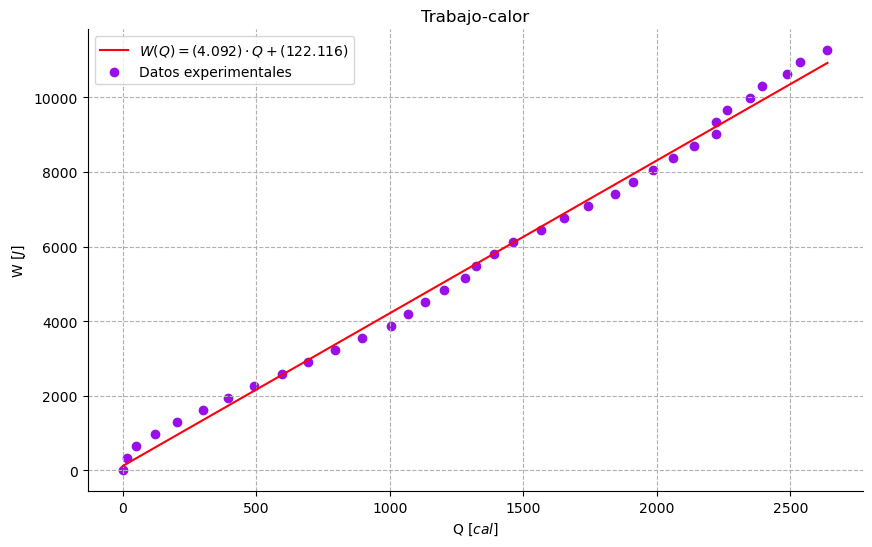

In [10]:
coeff1 = np.polyfit(m_q,m_w,1)  # El primer coeficiente es el equivalente
x1 = np.linspace(m_q[0],m_q[-1],100)

plt.figure(figsize=(10,6))
plt.scatter(m_q,m_w, color='xkcd:violet',marker='o', zorder=1, label='Datos experimentales')
plt.plot(x1, np.polyval(coeff1,x1), color="xkcd:bright red", zorder=2,
        label=rf"$W(Q) = ({coeff1[0]:.3f}) \cdot Q + ({coeff1[1]:.3f})$")
plt.ylabel(r"W $[J]$")
plt.xlabel(r"Q $[cal]$")
plt.title("Trabajo-calor") 
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='both', linestyle="--")
plt.legend()
plt.savefig('mecworkheat.png', dpi=300)
plt.show()